In [6]:
import numpy as np
import matplotlib.pyplot as plt

def U(A, alpha):
    # Vectorized distance computation for all pairs
    dist_matrix = np.linalg.norm(A[:, np.newaxis] - A, axis=2)
    # Avoid division by zero by filling the diagonal with inf
    np.fill_diagonal(dist_matrix, np.inf)
    u = np.sum(1 / dist_matrix**alpha)
    return u

def C(a, A, alpha, U_value, dist_matrix):
    # Calculate C(a) by subtracting the contribution of the a-th row/column
    dist_a = dist_matrix[a, :]
    dist_a[a] = np.inf  # To avoid self-distance
    c = U_value - np.sum(1 / dist_a**alpha)
    return c

def getSstar(A, alpha, n):
    Sstar = A.copy()
    while len(Sstar) > n:
        U_value = U(Sstar, alpha)
        dist_matrix = np.linalg.norm(Sstar[:, np.newaxis] - Sstar, axis=2)
        np.fill_diagonal(dist_matrix, np.inf)
        
        c_values = np.array([C(i, Sstar, alpha, U_value, dist_matrix) for i in range(len(Sstar))])

        index_max_value = np.argmax(c_values)
        Sstar = np.delete(Sstar, index_max_value, axis=0)

    return Sstar


In [2]:
alpha = 0.7
A = np.loadtxt('ZCAT1_1000_02D.pof')
n = 100

Sstar = getSstar(A, alpha, n)

In [4]:
len(Sstar)

100

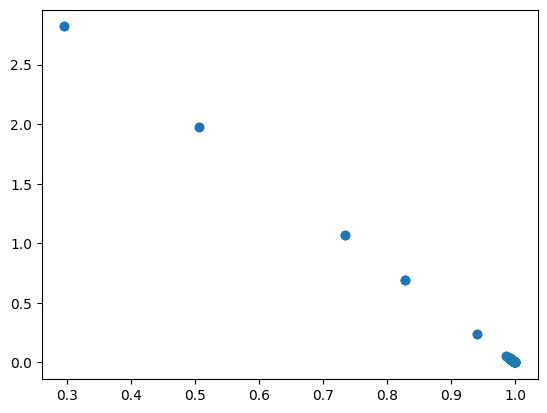

In [7]:
plt.scatter(Sstar[:, 0], Sstar[:, 1])